In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [77]:
df = pd.read_csv('titanic_toy.csv')

In [78]:
df.head() 

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [79]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [80]:
df.isnull().mean()     
  
# this shows that this much amount of data is missing here 
# like in 'Age', there are 90% data are missing there  

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [81]:
# main aim to impute values in 'Age' and 'Fare' column(by putting in missing values) using mean_median_imputation

X = df.drop(columns=['Survived'])   
y = df['Survived']

In [82]:
# Apply train_test_split method here

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [83]:
X_train.head()

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0


In [84]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [85]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [86]:
# finding mean of 'age' and 'fare'

mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [87]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [88]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
247,24.0,14.5000,2,24.0,24.0,14.5000,14.500000
265,36.0,10.5000,0,36.0,36.0,10.5000,10.500000
294,24.0,7.8958,0,24.0,24.0,7.8958,7.895800
271,25.0,NaN,0,25.0,25.0,14.4583,32.617597
623,21.0,7.8542,0,21.0,21.0,7.8542,7.854200


In [89]:
# it is important that you have to check the change in variance after finding mean and median imputation   

print("original age variable variance:", X_train['Age'].var())
print("Age variance after median imputation:", X_train['Age_median'].var())
print("Age variance after mean imputation:", X_train['Age_mean'].var())
print("\n")
print("Original fare variable variance:", X_train['Fare'].var())
print("Fare variance after median imputation", X_train['Fare_median'].var())
print("Fare variance after mean imputation", X_train['Fare_mean'].var())

# whenever we find mean and median imputation, then there is drastic change can be seen in "variance"(it shrinked) 
# because your most of the values are shifted towards the mean, so variance just decreased  

# you should take care that "variance" dosesn't get too much shrinked(i.e., drastic shrinked), o/w it's a RED FLAG.

# for 'Fare', there is not too much drastic change appears, because there are less missing values in 'fare' 

original age variable variance: 204.34951339046142
Age variance after median imputation: 161.98956633460548
Age variance after mean imputation: 161.81262452718676


Original fare variable variance: 2448.1979137063163
Fare variance after median imputation 2340.09102197536
Fare variance after mean imputation 2324.2385256705534


In [90]:
# Now, you have to check that what are the changes can be seen in the distribution through graph plotting

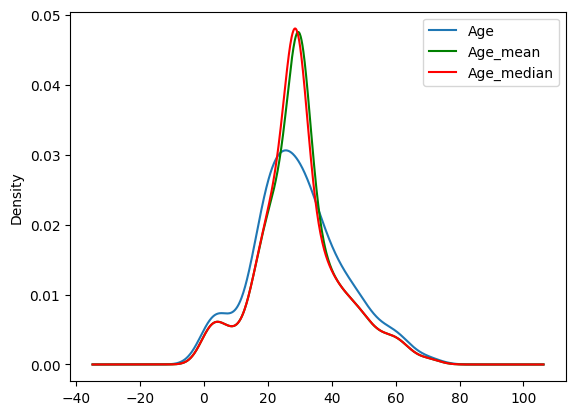

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputation with mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# variable imputation with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# so, in this case, we can see that there is drastic change appears at the centre of the peak
# that's not a fair (it's a RED FLAG)

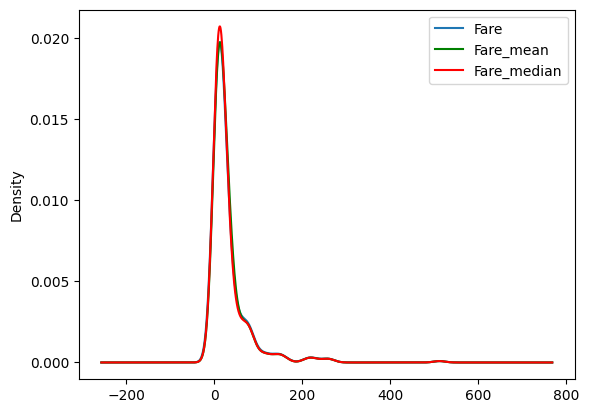

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# It's a preety fine graph (as here all variance, mean and medain overlaps with each other)
# So, it's a perfect match

In [93]:
# Now, find 'covariance' and 'correlation' to check what happened with other columns 

X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [94]:
X_train.corr()  # for finding coorelation between the columns

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

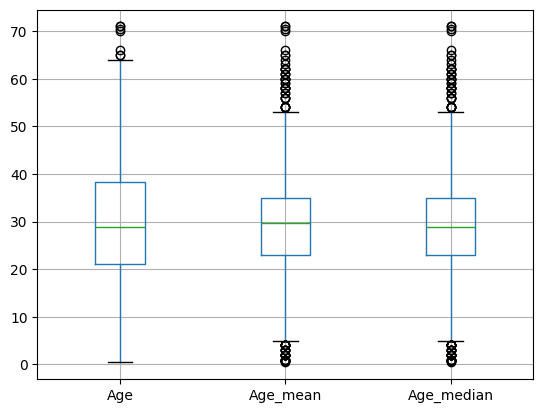

In [95]:
# Now, comes to the boxplot to check for outliers

X_train[['Age', 'Age_mean', 'Age_median']].boxplot()

# So here, in 'Age_mean' and 'Age_median' there is too much outliers, so it's also not good
# hence, we can say that it's a RED flag

<Axes: >

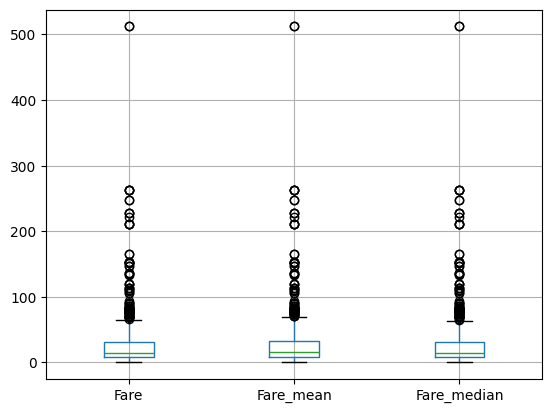

In [96]:
X_train[['Fare', 'Fare_mean', 'Fare_median']].boxplot()

# so, here you can see easily that there is not much change can be seen in this.
# hence, it's a perfectly fine graph.

<h4> Using Sklearn </h4>

In [97]:
# Now, we learn all above opertions using skleran

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [98]:
# make two classes of imputers and apply imputation with mean and median

imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [99]:
trf = ColumnTransformer([
     ('imputer1', imputer1, ['Age']),
     ('imputer2', imputer2, ['Fare'])
    ], remainder='passthrough')

In [100]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [101]:
trf.named_transformers_

{'imputer1': SimpleImputer(strategy='median'),
 'imputer2': SimpleImputer(),
 'remainder': FunctionTransformer(accept_sparse=True, check_inverse=False,
                     feature_names_out='one-to-one')}

In [102]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [103]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [104]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [105]:
X_train   

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])